## Yelp 
Yelp is American multinational company. Yelp's website, Yelp.com, is a crowd-sourced local business review and social networking site.Yelp was founded in 2004. The company also trains small businesses in how to respond to reviews, hosts social events for reviewers, and provides data about businesses, including health inspection scores.

* [Offial website](https://www.yelp.com/)
* [Wiki](https://en.wikipedia.org/wiki/Yelp)
***
Steps:
* [Business](#Business)
* [Checkins](#Checkins)
* [Tips](#Tips)
* [Review](#Review)


### Import packages¶

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from mpl_toolkits.basemap import Basemap

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import string
import re 
import gensim 
from gensim import corpora

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.style.use('bmh')

### Read Dataset

In [12]:
path = 'file/'
#path = '../input/'
business = pd.read_csv(path + 'yelp_business.csv')
business_hour = pd.read_csv(path + 'yelp_business_hours.csv')
checkin = pd.read_csv(path + 'yelp_checkin.csv')
tips = pd.read_csv(path+'yelp_tip.csv',nrows=10000)
#review = pd.read_csv(path+'yelp_review.csv',nrows = 100000)

In [13]:
def basic_details(df):
    print('Row:{}, columns:{}'.format(df.shape[0],df.shape[1]))
    k = pd.DataFrame()
    k['number of Unique value'] = df.nunique()
    k['Number of missing value'] = df.isnull().sum()
    k['Data type'] = df.dtypes
    return k

## Business

In [6]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [4]:
basic_details(business)

Row:174567, columns:13


,number of Unique value,Number of missing value,Data type
business_id,174567,0,object
name,132619,0,object
neighborhood,408,106552,object
address,138564,0,object
city,1093,1,object
state,67,1,object
postal_code,16004,623,object
latitude,138432,1,float64
longitude,138844,1,float64
stars,9,0,float64


### Distribution of rating
Let look at distribution of rating given by the user for different business.

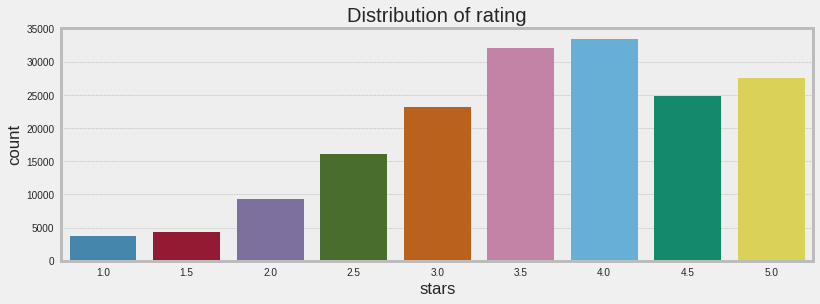

In [5]:
plt.figure(figsize=(12,4))
ax = sns.countplot(business['stars'])
plt.title('Distribution of rating');

we can find the most most of user giver 4 stars to the different businesses
***
### What is polular Name?
Lets look at popular tag name used in for thier store for business.

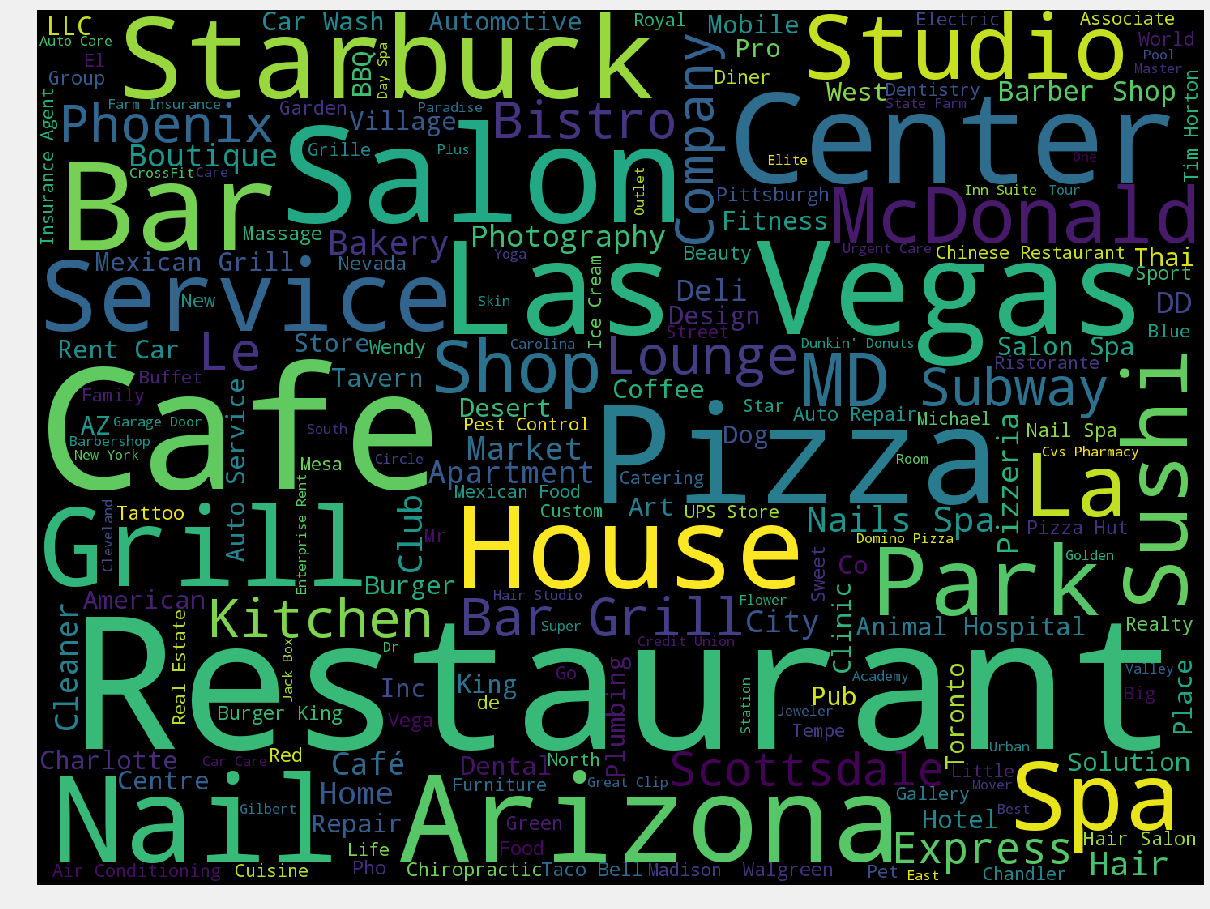

In [76]:
cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(business['name'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

14174

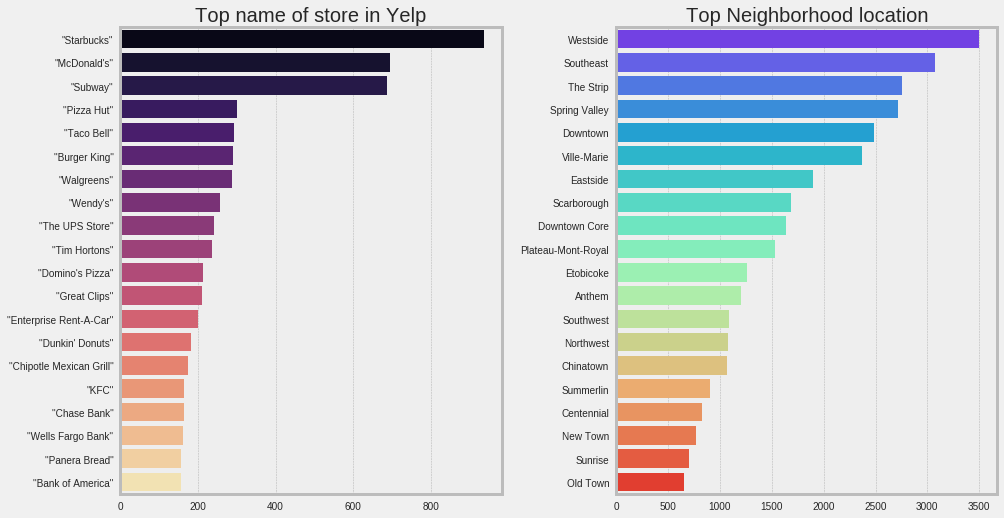

In [394]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = business['name'].value_counts()[:20].to_frame()

sns.barplot(cnt['name'], cnt.index, palette = 'magma', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top name of store in Yelp')

cnt = business['neighborhood'].value_counts()[:20].to_frame()

sns.barplot(cnt['neighborhood'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top Neighborhood location')
plt.subplots_adjust(wspace=0.3)
gc.collect()

We find,
* name of business entity present in yelp.com is 132619
* 'Starbucks' is top in list
* 'Chase bank' and 'Bank of America' is in top 20
* Thier are many missing values in 'Neighborhood' varaible in data set
* 'Westside' location is top the list
* Restaurant is most popular tag name
***
### Location

/home/sudhir/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/sudhir/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/sudhir/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


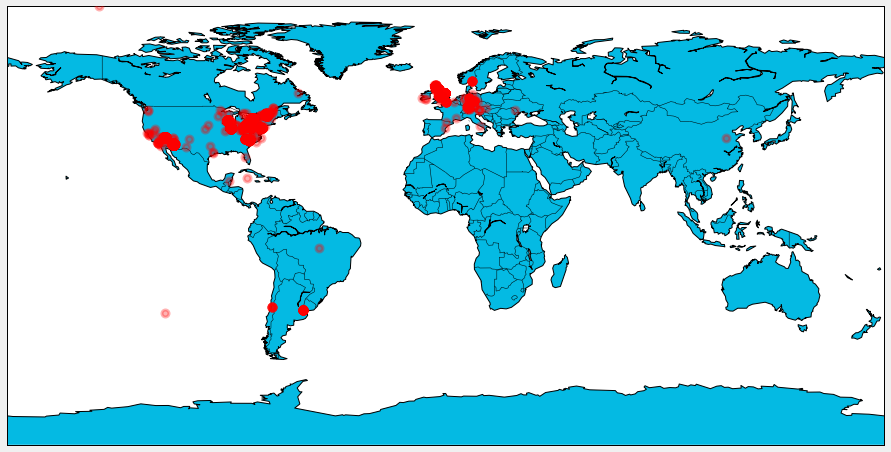

In [59]:
fig = plt.figure(figsize=(14, 8), edgecolor='w')
m = Basemap(projection='cyl',llcrnrlon= -180, urcrnrlon = 180, llcrnrlat = -90, urcrnrlat= 90,resolution='c',
           lat_ts = True)
m.drawcoastlines()
m.fillcontinents(color='#04BAE3',lake_color='#FFFFFF')
m.drawcountries()
m.drawmapboundary(fill_color='#FFFFFF')

mloc = m(business['latitude'].tolist(),business['longitude'].tolist())
m.scatter(mloc[1],mloc[0],color ='red',lw=3,alpha=0.3,zorder=5)

Number of city listed 1093


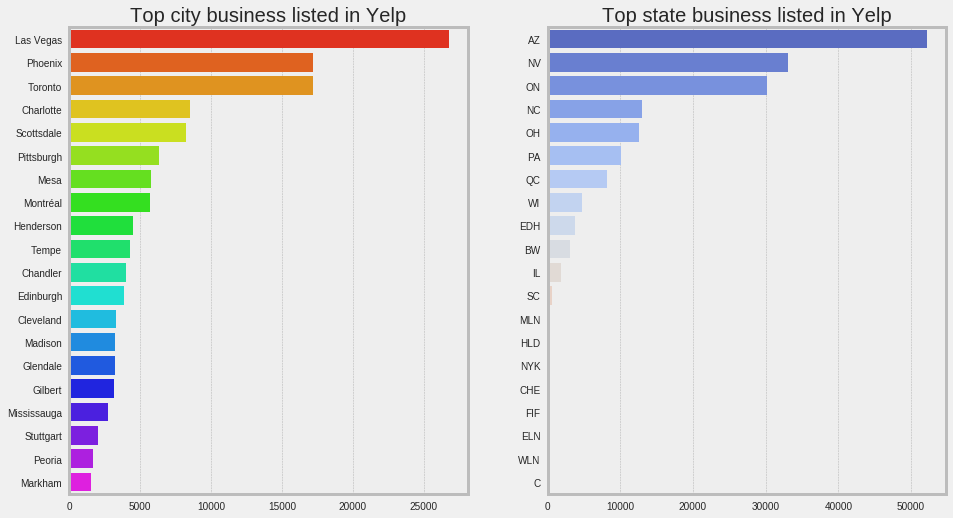

In [9]:
print('Number of city listed',business['city'].nunique())
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = business['city'].value_counts()[:20].to_frame()

sns.barplot(cnt['city'], cnt.index, palette = 'gist_rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top city business listed in Yelp')

cnt = business['state'].value_counts()[:20].to_frame()

sns.barplot(cnt['state'], cnt.index, palette = 'coolwarm', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top state business listed in Yelp');

We find,
* there are 1093 city listed in yelp.com
* city Las Vegas is top list in business listing in Yelp.com followed by Phoniex,Toronto etc..
* thier are 67 state listed in yelp.com
* state AZ is top in the list of Yelp.com
* There are few states having very few business listing


## Review count

Median review count 8.0


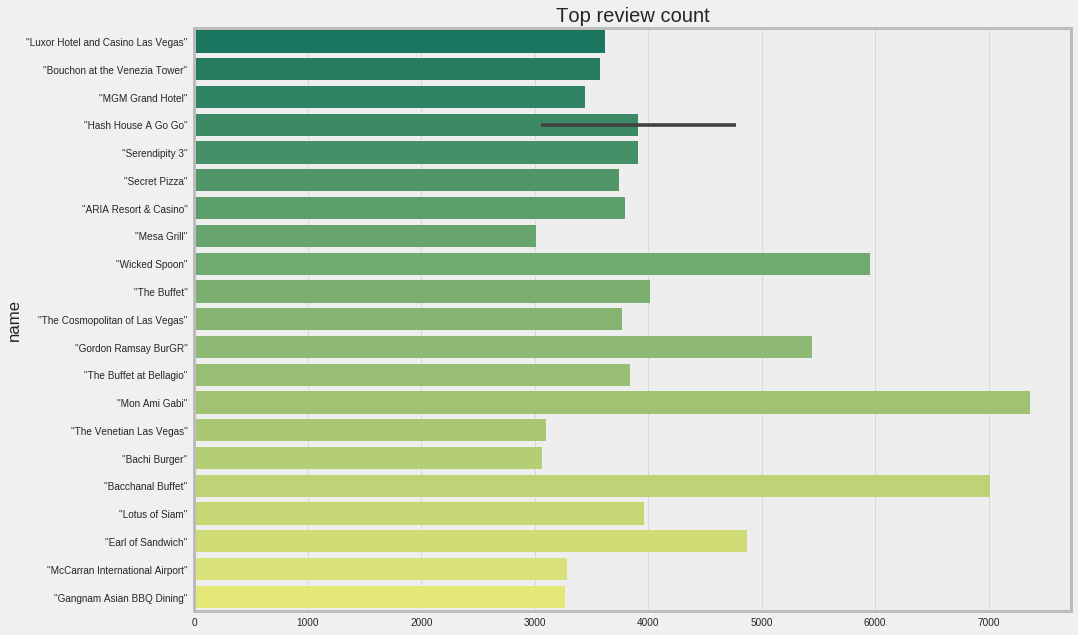

In [90]:
print('Median review count',business['review_count'].median())
plt.figure(figsize = (14,10))
sns.barplot(business[business['review_count'] >3000]['review_count'],business[business['review_count'] >3000]['name'],
           palette = 'summer')
plt.xlabel('')
plt.title('Top review count');

* The reivew count for 'Mon Ami Gabi is top in list, which is more than 7000.
* The median review count is 8 for business

### Is open?

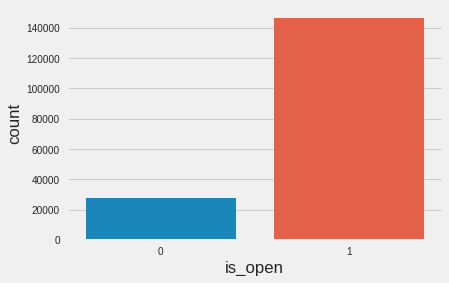

In [10]:
plt.figure(figsize=(14,5))
sns.countplot(business['is_open'])

We can find that most of business are operating still

### Categotry

(-0.5, 1399.5, 999.5, -0.5)

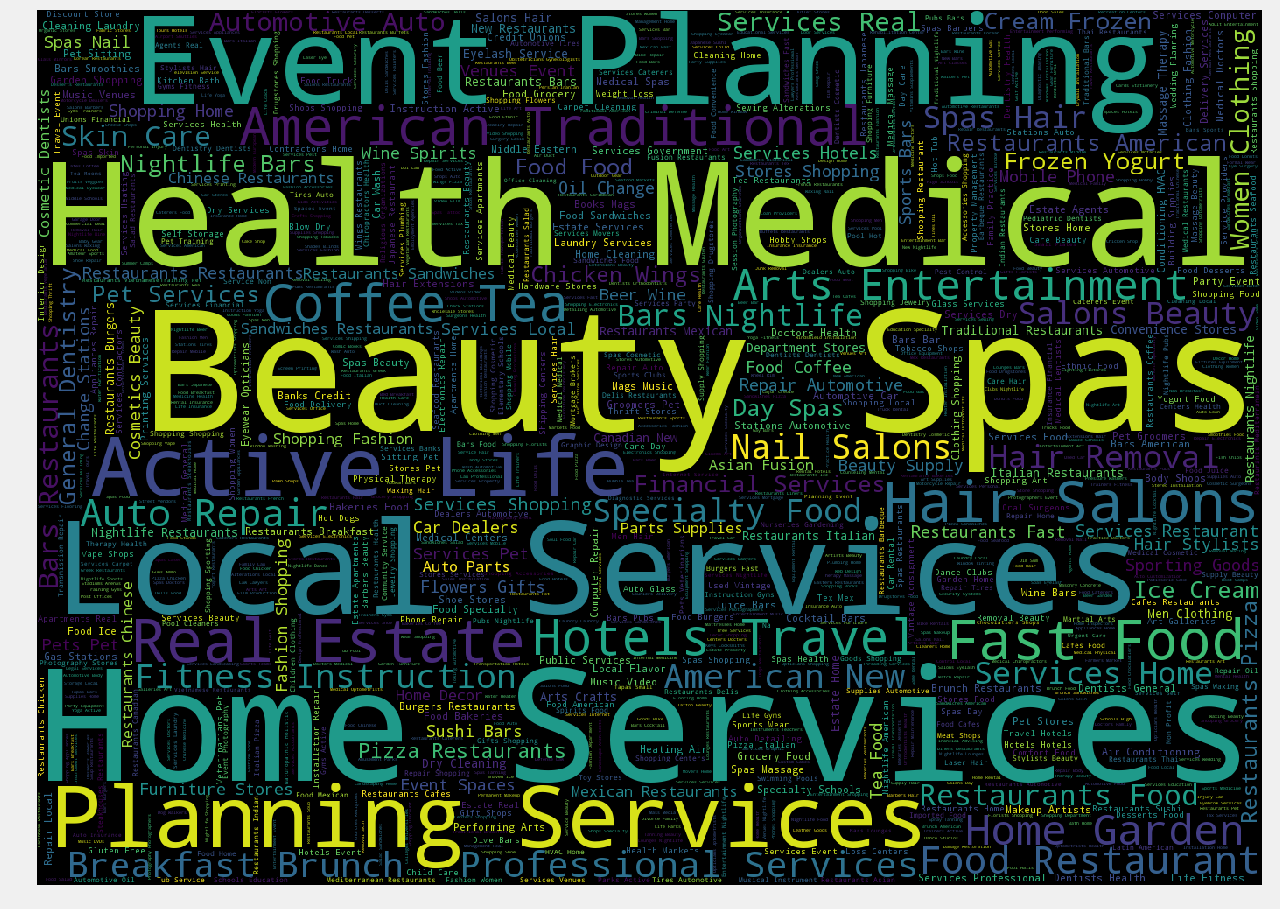

In [70]:
cloud = WordCloud(width=1440, height= 1080,max_words= 1000).generate(' '.join(business['categories'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

Maximum number of category 36
Median category of business 3.0


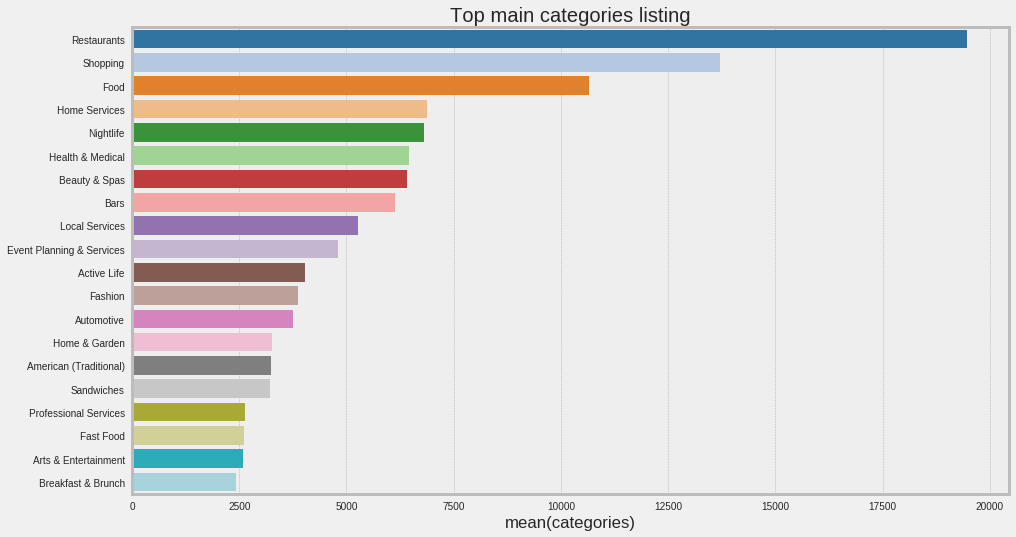

In [93]:
print('Maximum number of category',business['categories'].str.split(';').str.len().max())
print('Median category of business',business['categories'].str.split(';').str.len().median())
corpus = ' '.join(business['categories'])

corpus = pd.DataFrame(corpus.split(';'),columns=['categories'])
cnt = corpus['categories'].value_counts().to_frame()[:20]
plt.figure(figsize=(14,8))
sns.barplot(cnt['categories'], cnt.index, palette = 'tab20')
plt.title('Top main categories listing');

We find
* The restaurant, shopping,food are top catergory of business in the list

## Checkins

In [228]:
checkin.head()

,business_id,weekday,hour,checkins
0,7KPBkxAOEtb3QeIL9PEErg,Sat,1:00,3
1,kREVIrSBbtqBhIYkTccQUg,Sat,16:00,1
2,tJRDll5yqpZwehenzE2cSg,Thu,0:00,1
3,r1p7RAMzCV_6NPF0dNoR3g,Sat,23:00,1
4,mDdqgfrvROGAumcQdZ3HIg,Thu,22:00,1


In [229]:
basic_details(checkin)

Row:146350, columns:4


,number of Unique value,Number of missing value,Data type
business_id,146350,0,object
weekday,7,0,object
hour,24,0,object
checkins,112,0,int64


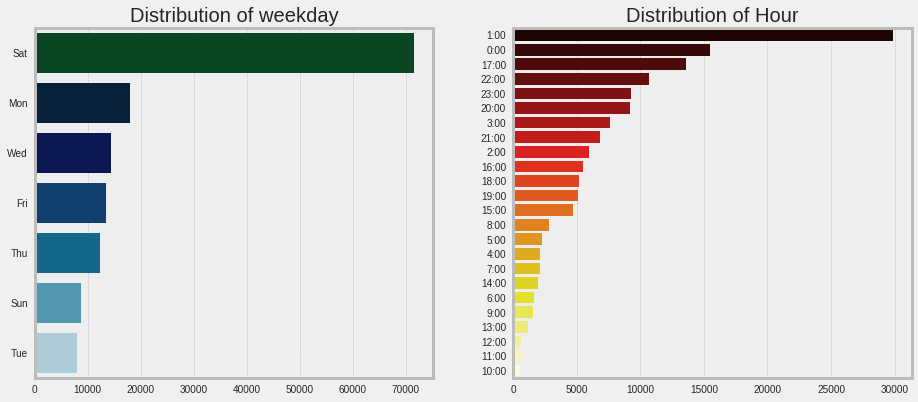

In [6]:
f,ax = plt.subplots(1,2, figsize = (14,6))
ax1,ax2, = ax.flatten()
cnt = checkin['weekday'].value_counts().to_frame()
sns.barplot(cnt['weekday'], cnt.index, palette = 'ocean', ax=ax1)
ax1.set_title('Distribution of weekday')
ax1.set_xlabel('')

cnt = checkin['hour'].value_counts().to_frame()
sns.barplot(cnt['hour'], cnt.index, palette = 'hot', ax=ax2)
ax2.set_title('Distribution of Hour')
ax2.set_xlabel('');

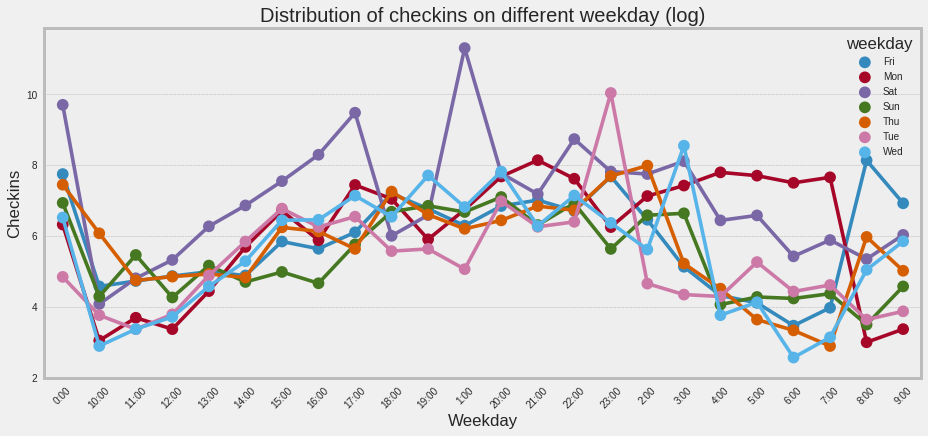

In [42]:
k = checkin.groupby(['weekday','hour',])['checkins'].sum().to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.pointplot(y = k['checkins'],x = k['hour'],hue = k['weekday'],alpha=0.3)
plt.ylabel('Checkins')
plt.title('Distribution of checkins on different weekday (log)')
plt.xlabel('Weekday')
plt.xticks(rotation=45);

## Tips

In [13]:
tips.head()

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


In [88]:
basic_details(tips)

Row:10000, columns:10


,number of Unique value,Number of missing value,Data type
text,9884,0,object
date,2468,0,object
likes,3,0,int64
business_id,4056,0,object
user_id,536,0,object
clean_text,9689,0,object
num_words,95,0,int64
num_uniq_words,75,0,int64
num_chars,361,0,int64
num_stopwords,52,0,int64


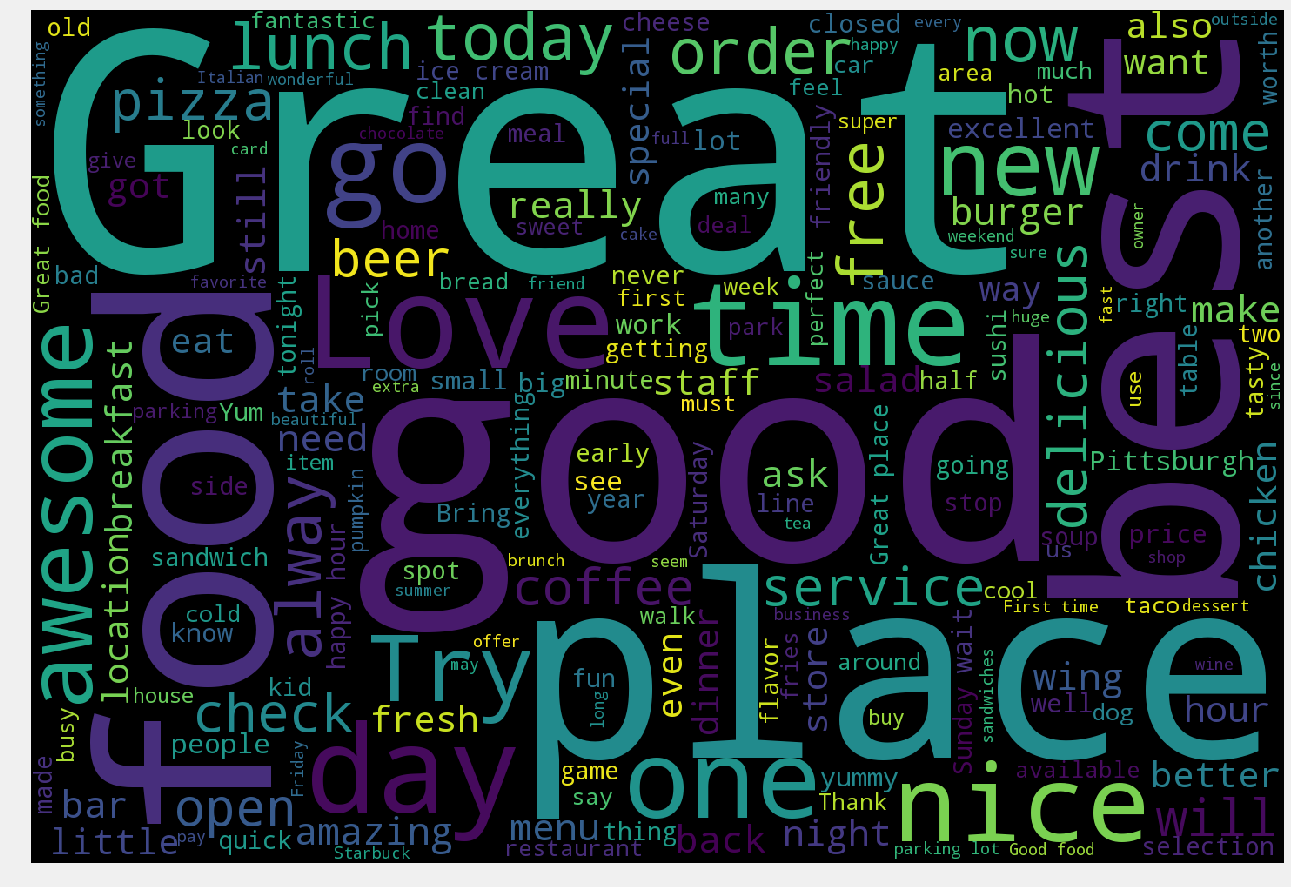

In [80]:
cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(tips['text'].astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off');

In [87]:
def text_len(df):
    #i = ['text']
    df['num_words'] = df['text'].apply(lambda x: len(str(x).split()))
    df['num_uniq_words'] = df['text'].apply(lambda x: len(set(str(x).split())))
    df['num_chars'] = df['text'].apply(lambda x: len(str(x)))
    df['num_stopwords'] = df['text'].apply(lambda x: len([w for w in str(x).lower().split() 
                                                          if w in set(stopwords.words('english'))]))
text_len(tips)

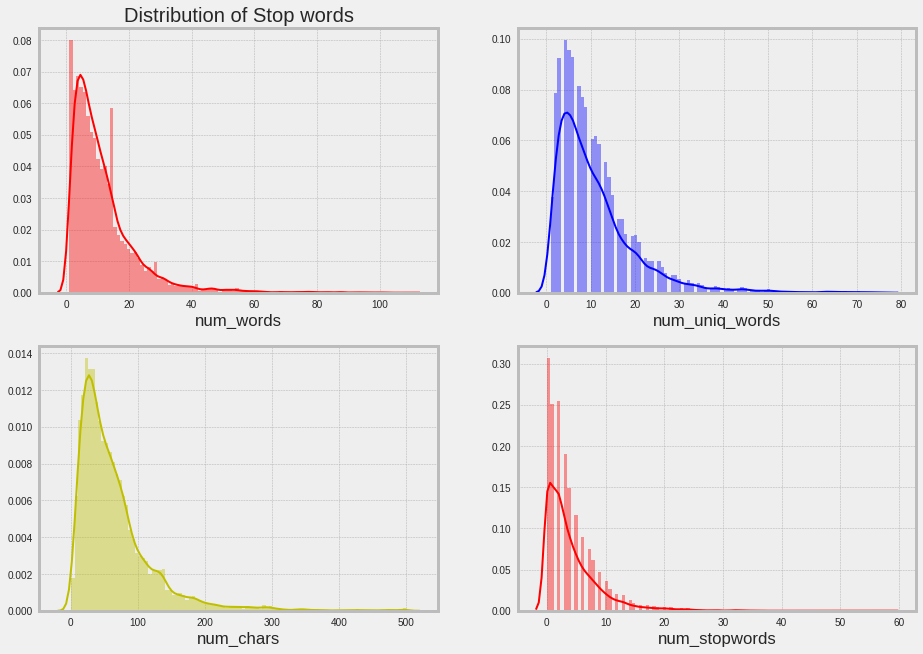

In [86]:
f, ax = plt.subplots(2,2, figsize = (14,10))
ax1,ax2,ax3,ax4 = ax.flatten()
sns.distplot(tips['num_words'],bins=100,color='r', ax=ax1)
ax1.set_title('Distribution of Number of words')

sns.distplot(tips['num_uniq_words'],bins=100,color='b', ax=ax2)
ax1.set_title('Distribution of Unique words')

sns.distplot(tips['num_chars'],bins=100,color='y', ax=ax3)
ax1.set_title('Distribution of Char words')

sns.distplot(tips['num_stopwords'],bins=100,color='r', ax=ax4)
ax1.set_title('Distribution of Stop words')


* The tips given by user is having median words are about 10.
* There are few people given tips more than 100 words

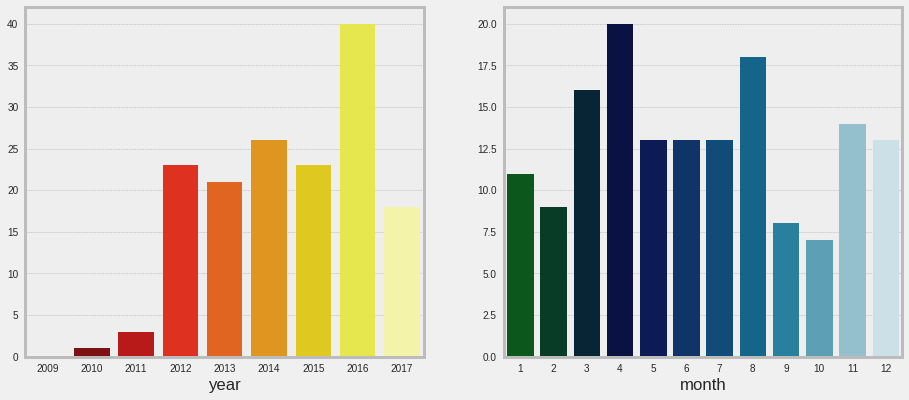

In [15]:
tips['date'] = pd.to_datetime(tips['date'])
tips['year'] = tips['date'].dt.year
tips['month'] = tips['date'].dt.month

f,ax = plt.subplots(1,2,figsize = (14,6))
ax1,ax2 = ax.flatten()
cnt  = tips.groupby('year').sum()['likes'].to_frame()
sns.barplot(cnt.index,cnt['likes'],palette='hot', ax = ax1)
ax1.set_ylabel('')

cnt  = tips.groupby('month').sum()['likes'].to_frame()
sns.barplot(cnt.index,cnt['likes'],palette='ocean', ax = ax2)
ax2.set_ylabel('')

## Topic modeling

In [49]:
# clean text
lemma = WordNetLemmatizer()

def clean_text(doc):
    corpus = []
    for c in range(0, doc.shape[0]):
        stop_free = ' '.join([i for i in doc['text'][c].lower().split() if i not in set(stopwords.words('english'))])
        puct_free = ''.join(i for i in stop_free if i not in set(string.punctuation))
        normalized = [lemma.lemmatize(word) for word in puct_free.split()]
        corpus.append(normalized)
    return corpus
doc_tips = clean_text(tips)

In [52]:
# LDA model
dictionary = corpora.Dictionary(doc_tips)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_tips]
ldamodel = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics= 3, id2word= dictionary, passes=20)


In [66]:
#print(ldamodel.print_topics(num_topics=3,num_words=5))

for topic in ldamodel.show_topics(num_topics=5, formatted=False, num_words= 5):
    print('Topic {}: words'.format(topic[0]))
    topic_word = [w for (w,val) in topic[1]]
    print(topic_word)


Topic 0: words
['great', 'good', 'food', 'service', 'place']
Topic 1: words
['lunch', 'open', 'check', 'place', 'menu']
Topic 2: words
['it', 'time', 'get', 'dont', 'try']


### Business Hour

In [193]:
business_hour.head()

,business_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday
0,FYWN1wneV18bWNgQjJ2GNg,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,7:30-17:0,None,None
1,He-G7vWjzVUysIKrfNbPUQ,9:0-20:0,9:0-20:0,9:0-20:0,9:0-20:0,9:0-16:0,8:0-16:0,None
2,KQPW8lFf1y5BT2MxiSZ3QA,None,None,None,None,None,None,None
3,8DShNS-LuFqpEWIp0HxijA,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-19:0
4,PfOCPjBrlQAnz__NXj9h_w,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-1:0,11:0-2:0,11:0-0:0


In [80]:
basic_details(business_hour)

Row:174567, columns:8


,number of Unique value,Number of missing value,Data type
business_id,174567,0,object
monday,1396,0,object
tuesday,1402,0,object
wednesday,1407,0,object
thursday,1443,0,object
friday,1513,0,object
saturday,1444,0,object
sunday,1291,0,object


In [41]:
col = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday','saturday', 'sunday']
op = business_hour.groupby(col).count().reset_index().sort_values(by='business_id',ascending=False)

op[:20]
gc.collect()

,monday,tuesday,wednesday,thursday,friday,saturday,sunday,business_id
44199,None,None,None,None,None,None,None,45307
0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,0:0-0:0,6353
26847,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,None,None,2445
31972,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,None,None,2135
3745,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,10:0-21:0,11:0-18:0,866
9079,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-23:0,11:0-23:0,11:0-22:0,823
8872,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-22:0,818
31932,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,None,531
4279,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,10:0-22:0,529
7934,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,11:0-21:0,520


We find
* There are 45307 None values in table
* There are 6353 stores open 24/7
* There many different combination of store operating time is present in the table

## Review

In [94]:
## continued

### Thank you